# Converting EEG data into BIDS Format
## Author: Will Decker

Load necessary libraries

In [2]:
import os
import os.path as op
import shutil
import mne
from mne.datasets import eegbci
from mne_bids import write_raw_bids, BIDSPath, print_dir_tree
from mne_bids.stats import count_events

Load data

In [13]:
datadir = "/Users/lendlab/Desktop/MNE/rawdata/raw/BIDS"; # path to raw data

print_dir_tree(datadir) # expands files in kernel

# create an empty list to store the raw data
raw_data = []

# loop through the files in the folder
for filename in os.listdir(datadir):
    # check if the file is a BrainVision (.vhdr) file
    if filename.endswith(".vhdr"):
        # construct the full file path
        file_path = os.path.join(datadir, filename)
        # load the data from the BrainVision file
        raw = mne.io.read_raw_brainvision(file_path)
        # add the raw data to the list
        raw_data.append(raw)

# combine the raw data into a single raw object
raw = mne.concatenate_raws(raw_data)

print(raw.info)

|BIDS/
|--- .DS_Store
|--- sub-005.eeg
|--- sub-005.vhdr
|--- sub-005.vmrk
|--- sub-008.eeg
|--- sub-008.vhdr
|--- sub-008.vmrk
|--- sub-028.eeg
|--- sub-028.vhdr
|--- sub-028.vmrk
|--- sub-028_ses-001_task-wordlearning_run-001.eeg
|--- sub-028_ses-001_task-wordlearning_run-001.vhdr
|--- sub-028_ses-001_task-wordlearning_run-001.vmrk
|--- sub-029.eeg
|--- sub-029.vhdr
|--- sub-029.vmrk
|--- sub-029_ses-001_task-wordlearning_run-001.eeg
|--- sub-029_ses-001_task-wordlearning_run-001.vhdr
|--- sub-029_ses-001_task-wordlearning_run-001.vmrk
Extracting parameters from /Users/lendlab/Desktop/MNE/rawdata/raw/BIDS/sub-029_ses-001_task-wordlearning_run-001.vhdr...
Setting channel info structure...
Extracting parameters from /Users/lendlab/Desktop/MNE/rawdata/raw/BIDS/sub-028_ses-001_task-wordlearning_run-001.vhdr...
Setting channel info structure...
Extracting parameters from /Users/lendlab/Desktop/MNE/rawdata/raw/BIDS/sub-008.vhdr...
Setting channel info structure...
Extracting parameters fro

Convert to BIDS

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)


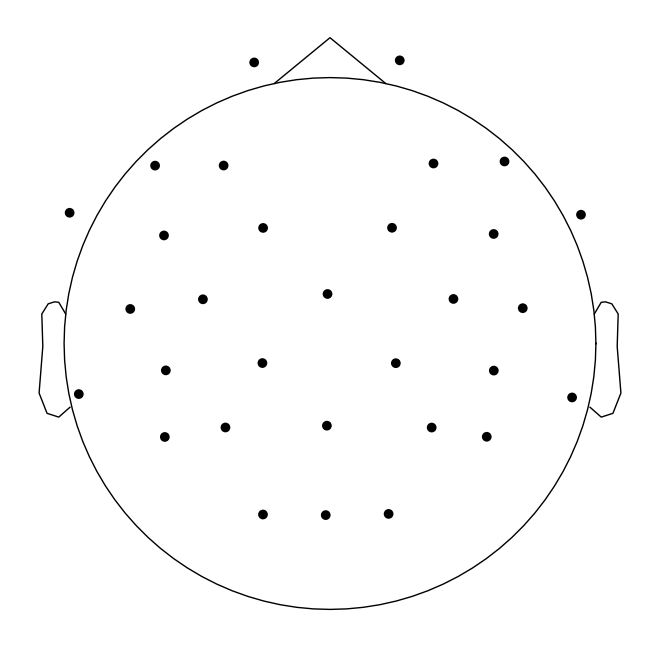

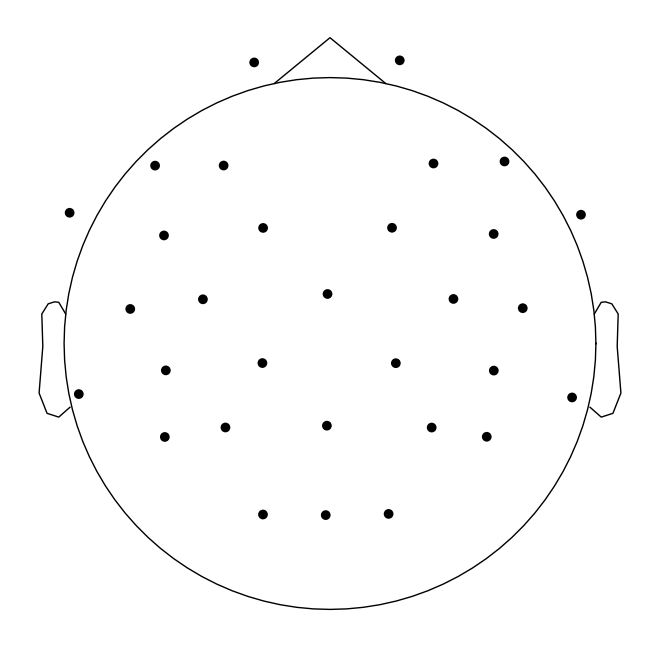

In [28]:
# make montage

get_montage = mne.channels.get_builtin_montages(descriptions = True)
for montage_name, montage_description in get_montage:
    print(f'{montage_name}: {montage_description}')
    montage = montage_name
    break

standard_montage = mne.channels.make_standard_montage(montage)
raw.set_montage(standard_montage)

raw.plot_sensors()